# Heart Disease Prediction
#### In this machine learning project, I have collected the dataset from Kaggle (httsz/wmw.kaggle.com/ronitf/heart-disease-uci)
#### and I will be using Machine Learning to predict whether any person is suffering from heart disease 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams # rcParams is a module within matplotlib that provides a way to customize the default settings of the library.By importing rcParams from matplotlib, you can modify the default settings for things like the size and dpi of figures, the font size and style of text, and the color palette used for plots. This allows you to create visualizations that are tailored to your specific needs and preferences.
from matplotlib.cm import rainbow # matplotlib.cm is a module within the matplotlib library that contains a collection of color maps. A color map is a mapping between a scalar value and a color, which is often used to represent data in a visualization.rainbow is one of the color maps available in matplotlib.cm.
%matplotlib inline # %matplotlib inline is a command in Jupyter Notebook and JupyterLab that enables the display of Matplotlib graphs and plots directly in the output cell of a Jupyter Notebook or JupyterLab interface.
import warnings # warnings is a built-in Python module that provides a way to handle warnings that occur during runtime. Warnings are messages that indicate that something unexpected or potentially problematic has occurred, but the program is still able to continue executing.
warnings.filterwarnings('ignore') #warnings.filterwarnings('ignore') is a command that sets the filter for warnings to "ignore", which means that any warnings that occur during the execution of the program will be suppressed and not displayed to the user.


UsageError: unrecognized arguments: # %matplotlib inline is a command in Jupyter Notebook and JupyterLab that enables the display of Matplotlib graphs and plots directly in the output cell of a Jupyter Notebook or JupyterLab interface.


### Here we are expermenting the 2 Algorithims
1. KNeighbors Classifier
2. Random Forest Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [9]:
df=pd.read_csv("C:\\Users\\mahen\\Downloads\\heart_cleveland_upload.csv") # i have used pandas to read the excel file of heart disease
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [10]:
df.info()# it prints a summary of the DataFrame's metadata,that includes columns ,dtypes,non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [11]:
df.describe() # describle method in pandas generates descriptive statistics for each numerical column in the DataFrame, including:count (number of non-null values),mean,standard deviation,minimum and maximum values,quartiles (25%, 50% or median, and 75%)
# describe will give idea of how the features get distributed 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Feature Selection

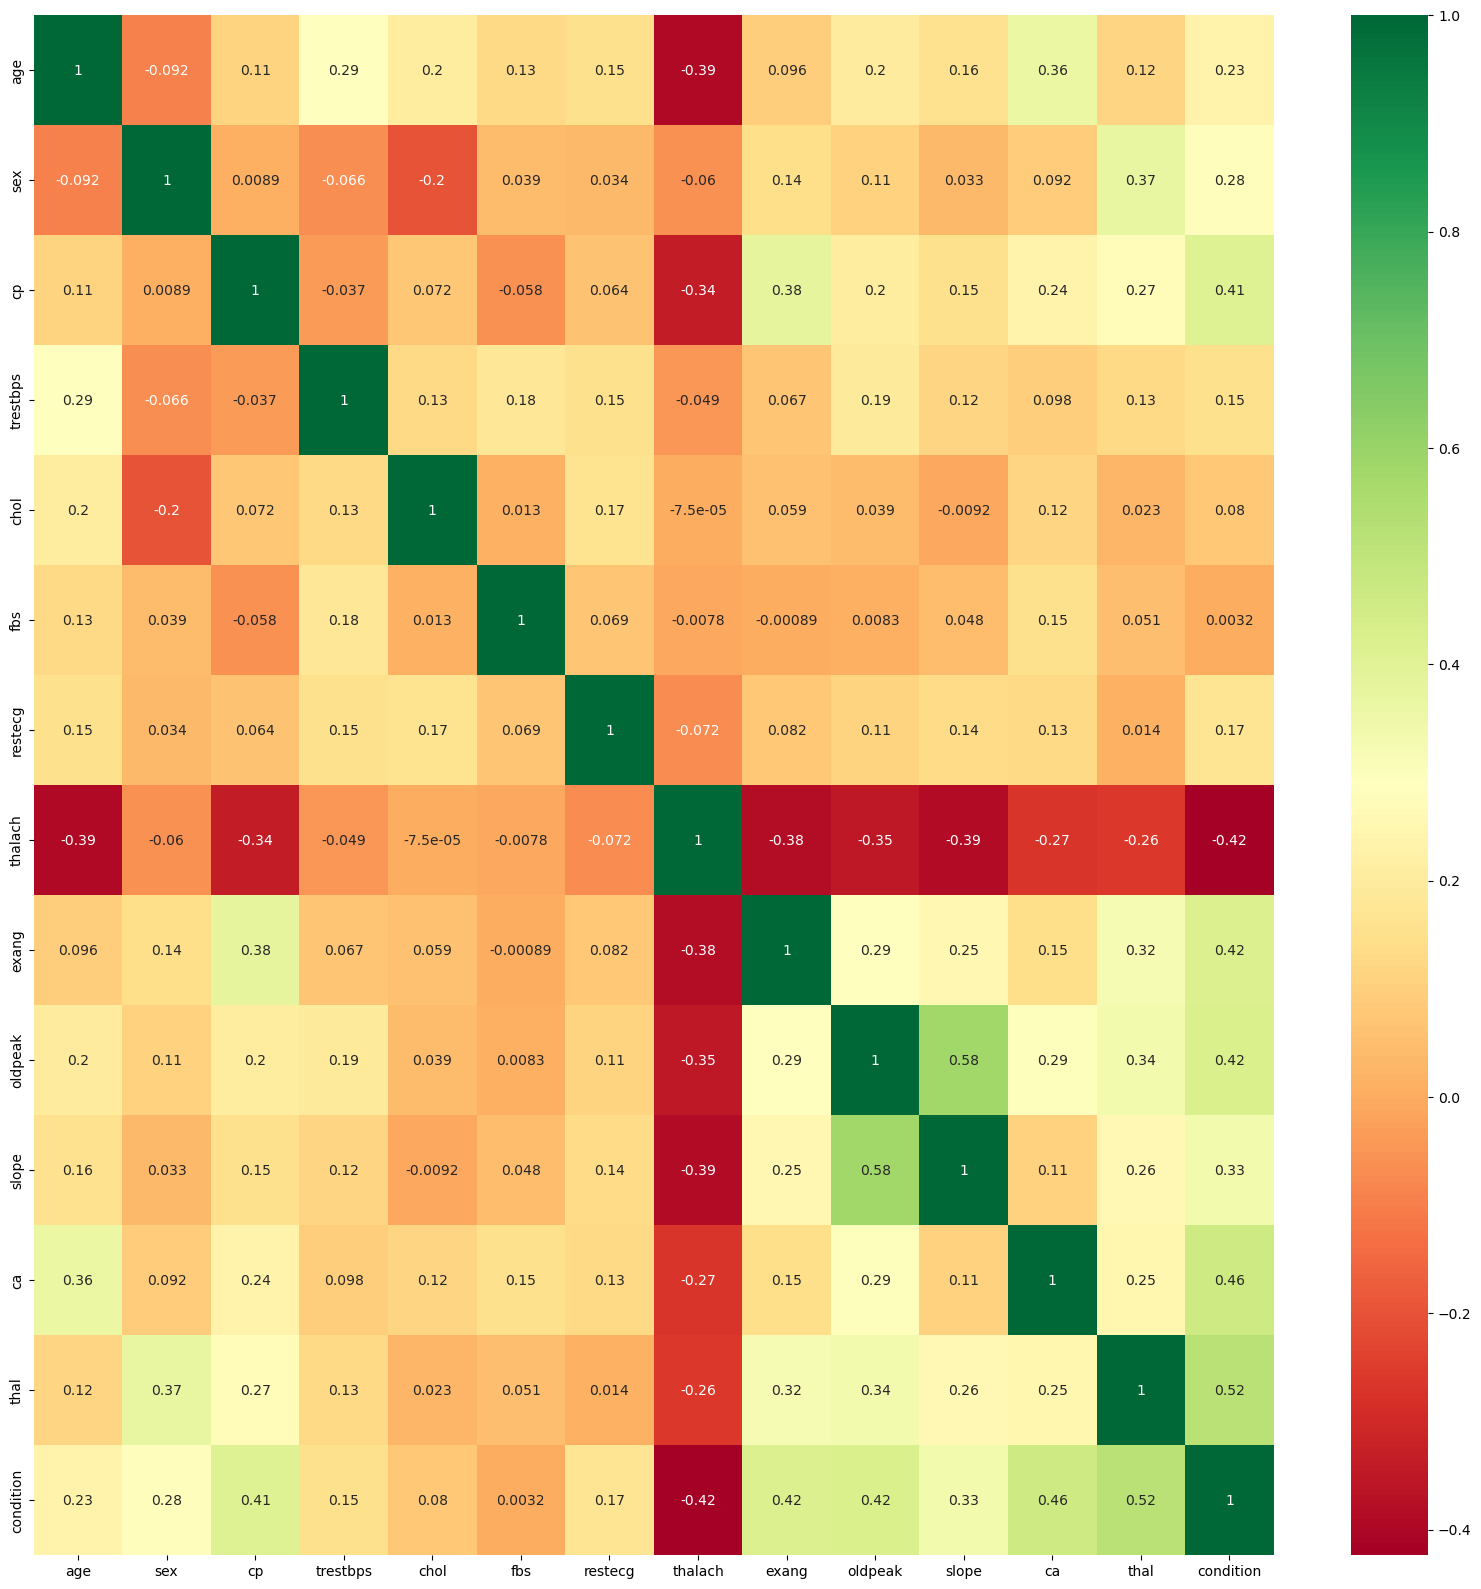

In [12]:
import seaborn as sns
# get correlations of each feature in dataset ,Actually correlation refers to a statistical measure that indicates the strength and direction of the relationship between two variables. Correlation is often used to determine whether two variables are related and to what extent they vary together.,A correlation coefficient is a numerical value that ranges between -1 and +1, where -1 indicates a perfect negative correlation (i.e., as one variable increases, the other decreases), +1 indicates a perfect positive correlation (i.e., as one variable increases, the other also increases), and 0 indicates no correlation (i.e., there is no relationship between the variables).
corrmat=df.corr() # here corr() is a correlation fuction it is used to find how the features are correlated w.r.t target output,A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. In data science, heatmaps are often used to visualize the correlation between variables in a dataset.To create a heatmap with correlation technique, we first calculate the correlation coefficient between each pair of variables in the dataset. This results in a correlation matrix, which contains the correlation coefficients for all pairs of variables.We can then plot the correlation matrix as a heatmap, where each cell in the heatmap represents the correlation coefficient between two variables. Typically, the color of the cell is used to indicate the strength of the correlation, with brighter colors indicating stronger correlations.calculates a correlation matrix for the dataframe df using the .corr() method and assigns it to the variable corrmat.
top_corr_features=corrmat.index# It then extracts the index of the correlation matrix (which corresponds to the column names of df) and assigns it to the variable top_corr_features.
plt.figure(figsize=(20,20)) # a figure with a size of 20x20 is created using plt.figure(figsize=(20,20))
# plot heat map , Heatmaps are particularly useful for identifying patterns and relationships between variables in a dataset, especially when there are many variables to analyze. They can also be used to identify potential areas of interest for further analysis and modeling.
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")# The seaborn heatmap function sns.heatmap() is then called with the correlation matrix of the top correlated features of df as the input data (df[top_corr_features].corr()) and additional arguments to annotate the heatmap cells and specify the color map. The resulting heatmap is assigned to the variable g.The annot=True argument displays the correlation coefficient values in each cell of the heatmap, and the cmap="RdYlGn" argument specifies the color map to use for the heatmap.
# Overall, this code is creating a heatmap of the correlation matrix for the top correlated features of df, which can be useful for visualizing the relationships between variables in the dataset
# make sure that  we need to use positive correlation features  and even we can use negative correlation values of features also but it would lead to the heart disease prediction may be high or the person suffering from the heart disease will be more


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

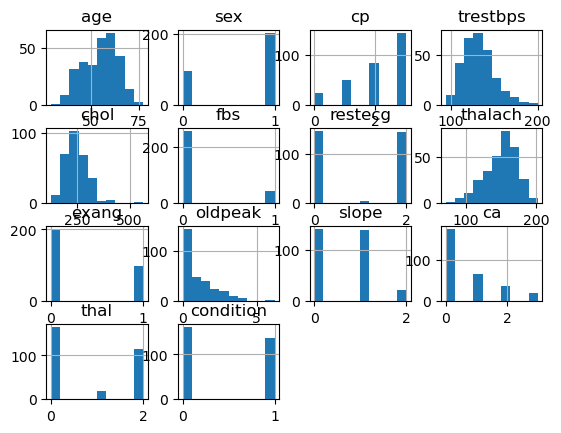

In [13]:
df.hist() # When you call df.hist(), Pandas generates a set of histograms, one for each column in the DataFrame. Each histogram shows the distribution of values for that column. By default, the number of bins in each histogram is set to 10, but you can change this by passing the bins parameter to the hist() method., and histogram It divides the range of values into a set of intervals (called "bins"), counts the number of observations that fall into each bin, and then plots the counts as bars whose height represents the number of observations in each bin.,Histograms are a useful tool for data exploration, as they can help you quickly identify the range of values for a variable, the shape of its distribution, and any outliers or unusual patterns in the data.


## Finding whether the dataset is balanced or not

#### AIM = Always remember that my here condition/target output is basically  whether the person is having the heart disease or not
#### here in condition column values of data frame which are 0 and 1 where 0 means the person not having the heart disease and 1 means the person having the heart disease 

<Axes: xlabel='condition', ylabel='count'>

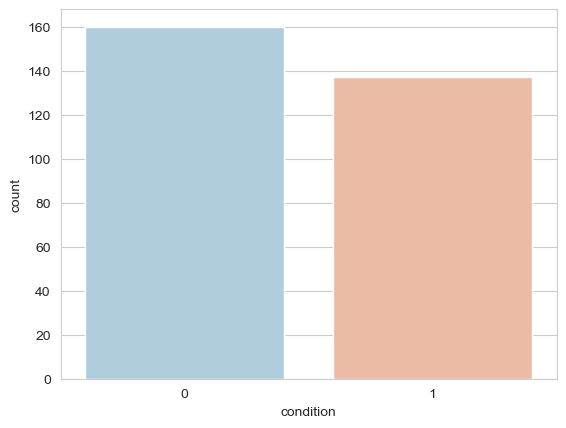

In [15]:
# the main part is we need to find whether the dataset is balanced or not in order to find out iam writing the code below
sns.set_style('whitegrid') #sns.set_style('whitegrid') sets the plot style to whitegrid, which adds horizontal grid lines to the plot.
sns.countplot(x='condition',data=df,palette='RdBu_r') # sns.countplot(x='condition', data=df, palette='RdBu_r') creates the countplot. The x parameter specifies the column to be plotted, which is condition in this case. The data parameter specifies the DataFrame to be used for plotting, which is df. The palette parameter specifies the color palette to be used for the plot, which is RdBu_r in this case.
# The resulting countplot shows the number of occurrences of each unique value in the condition column of df. It is a useful visualization for understanding the distribution of categorical data. it mean the condition column in df contains the value as 0 and 1 so here by using countplot we got to know how the condition column values get distributed 
# This looks like a quite balanced dataset because the count for 0 and 1 are 160 and 138 so we can say that it is balanced dataset



# IMBALANCED DATA SET  detail explanation

# Having a balanced dataset is important in data science because it can help to avoid biased or misleading results. A balanced dataset is one where the number of observations (or samples) in each class or category is roughly equal.

# When a dataset is imbalanced (i.e., when one class has significantly more observations than the others), it can lead to problems in training and evaluating machine learning models. For example, if a dataset has 90% of observations in one class and only 10% in another, a machine learning model trained on this dataset may become biased towards the majority class and perform poorly on the minority class. This is because the model will be optimized to minimize the overall error rate, which means it may ignore the minority class altogether in favor of the majority class.

# In addition, imbalanced datasets can lead to misleading performance metrics. For example, if a model trained on an imbalanced dataset achieves a high accuracy score, it may be misleading because the model may have simply learned to predict the majority class for all observations, which would result in a high accuracy score but poor performance on the minority class.

#To address these issues, it is often recommended to balance the dataset by either oversampling the minority class, undersampling the majority class, or using a combination of both techniques. This can help to ensure that machine learning models are trained on a representative sample of the data and can generalize well to new, unseen data.


# Data Preprocessing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all
the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables

In [16]:
dataset=pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])# The get_dummies() method in pandas is used to convert categorical variables into dummy variables, also known as indicator variables. Dummy variables are binary variables that represent the presence or absence of a category within a categorical variable.,For example, if you have a categorical variable color with values 'red', 'green', and 'blue', the get_dummies() method will create three columns, one for each unique value in the color variable. Each row in the new columns will contain a 1 or 0 to indicate whether that row's value for color is equal to the corresponding category.,By creating dummy variables, we can convert categorical variables into a format that can be used in machine learning models. This is because most machine learning algorithms require numerical input data. After creating dummy variables, we can further preprocess the data by scaling the values using methods such as min-max scaling or standard scaling, which can improve the performance of some machine learning models.
dataset
# detail explanation of categorical features
# Categorical features can be divided into two types: nominal and ordinal. Nominal categorical variables have no inherent order or ranking, and the categories are simply labels. Examples of nominal variables include gender, race, and country of origin. Ordinal categorical variables, on the other hand, have a specific order or ranking among the categories. Examples of ordinal variables include levels of education (e.g. high school, college, graduate school) or income levels (e.g. low, medium, high).
# Categorical features are often represented using strings or integers, with each value corresponding to a specific category. In data analysis and machine learning, these features may need to be converted to numerical representations in order to be used in models. This process is known as encoding, and there are several methods for doing so, such as one-hot encoding, ordinal encoding, and binary encoding.


,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,160,234,131,0.1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,140,239,151,1.8,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,150,226,114,2.6,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,138,282,174,1.4,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,110,211,144,1.8,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,152,223,181,0.0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
293,39,118,219,140,1.2,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
294,35,120,198,130,1.6,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
295,35,138,183,182,1.4,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler# here iam doing standard scalling becoz some features which i mention below they are having a lot of variations  and they have also measured in different different units,whenever if features are measured in different different units we should prefer using standard scalling that will help us scale down the values to same distribution
standardScaler=StandardScaler()# We use StandardScaler on some features to scale the data so that the mean of the feature is centered at zero and the standard deviation is 1. This is a commonly used technique in machine learning when dealing with continuous numerical features that have different scales or units.,The reason we use StandardScaler is that many machine learning algorithms, such as logistic regression, SVM, and K-nearest neighbors, assume that the input data is normally distributed and has a mean of zero and a standard deviation of one. If the features are not scaled, some features may dominate the others in terms of their contribution to the model's output. This can lead to biased results and poor performance of the machine learning model.By applying StandardScaler to the data, we can ensure that each feature has a similar scale and distribution, which can improve the performance of the machine learning models. StandardScaler transforms the data so that each feature has a mean of zero and a standard deviation of one, which makes it easier to compare the relative importance of features and to interpret the coefficients of the models.However, it is important to note that not all features may require scaling, particularly if they are already on a similar scale or if their distribution is close to normal. It's always a good practice to explore and understand the data before applying any preprocessing techniques.
columns_to_scale=['age','trestbps','chol','thalach','oldpeak'] # these are columns that iam doing scaling for not get dominent by other features interms of contribution to models output
dataset[columns_to_scale]=standardScaler.fit_transform(dataset[columns_to_scale]) # This line of code applies the fit_transform() method of the StandardScaler class to a subset of columns in a dataset.,StandardScaler is a preprocessing class in the sklearn.preprocessing module used for scaling numerical input data. The fit_transform() method of the StandardScaler class scales the input data by subtracting the mean value and dividing by the standard deviation for each feature. By doing so, the transformed data will have a mean of zero and a standard deviation of one.

dataset # after doing the scaling by standard scaler basically all the i/p features which are have lot of variation and different unit measurements got re-scale down by standard normal distribution


,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.600302,1.596266,-0.257179,-0.812095,-0.820813,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.600302,0.468418,-0.160859,0.061157,0.639470,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.268242,1.032342,-0.411292,-1.554358,1.326662,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.157555,0.355633,0.667499,1.065396,0.295874,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.046868,-1.223355,-0.700254,-0.244481,0.639470,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-1.609620,1.145127,-0.469085,1.371034,-0.906712,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
293,-1.720306,-0.772215,-0.546141,-0.419131,0.124076,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
294,-2.163054,-0.659431,-0.950688,-0.855757,0.467672,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
295,-2.163054,0.355633,-1.239649,1.414697,0.295874,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


## splitting the Dependent and Independent features

In [18]:
y=dataset['condition'] # here in the dataset condition is the output feature or dependent feature or target feature that we are trying to move to "y" variable 
x=dataset.drop(['condition'],axis=1) #iam trying to move all the independent/input features into x variable so for that iam trying to drop the target/dependent/output feature then rest all the features which are independent/input features get store in x variable  

In [19]:
from sklearn.model_selection import cross_val_score # cross_val_score is a function from the model_selection module of the scikit-learn library that provides a way to compute the cross-validated score of an estimator.,Cross-validation is a technique used to evaluate the performance of a machine learning model. It involves splitting the data into multiple folds, where in each fold, a subset of the data is used for testing and the remaining data is used for training. This process is repeated multiple times, with a different subset of the data used for testing in each iteration. The performance of the model is then averaged over all the iterations to obtain a more reliable estimate of its performance.,The cross_val_score function automates this process by taking an estimator, a dataset, and a cross-validation strategy as input, and returning an array of scores obtained from each fold. It can be used with any estimator that implements the fit and predict methods.,here estimator means ml models
knn_scores=[] # knn_scores=[]: create an empty list to store the cross-validation scores for each value of K.
for k in range(1,21): # for K in range(1,21):: loop over a range of K values from 1 to 20.
    knn_classifier=KNeighborsClassifier(n_neighbors=k) # This line creates a KNN classifier object by calling the KNeighborsClassifier() constructor from the scikit-learn library. The parameter n_neighbors is set to K, which specifies the number of nearest neighbors to consider when making predictions
    score=cross_val_score(knn_classifier,x,y,cv=10) # This line uses the cross_val_score() function from scikit-learn to perform cross-validation on the KNN classifier. The knn_classifier object is passed as the first argument, while x and y represent the input features and target variable, respectively. The cv parameter is set to 10, which specifies that 10-fold cross-validation should be used,The cross_val_score() function returns an array of scores, where each score represents the accuracy of the KNN classifier on a particular fold of the cross-validation. The score variable is assigned this array of scores.
    knn_scores.append(score.mean()) # knn_scores.append(score.mean()): append the mean score over the 10 folds to the knn_scores list.
    # At the end of the loop, knn_scores will contain the cross-validation scores for the KNN classifier with K values ranging from 1 to 20. These scores can be used to select the best value of K for the classifier based on the performance on the validation data.

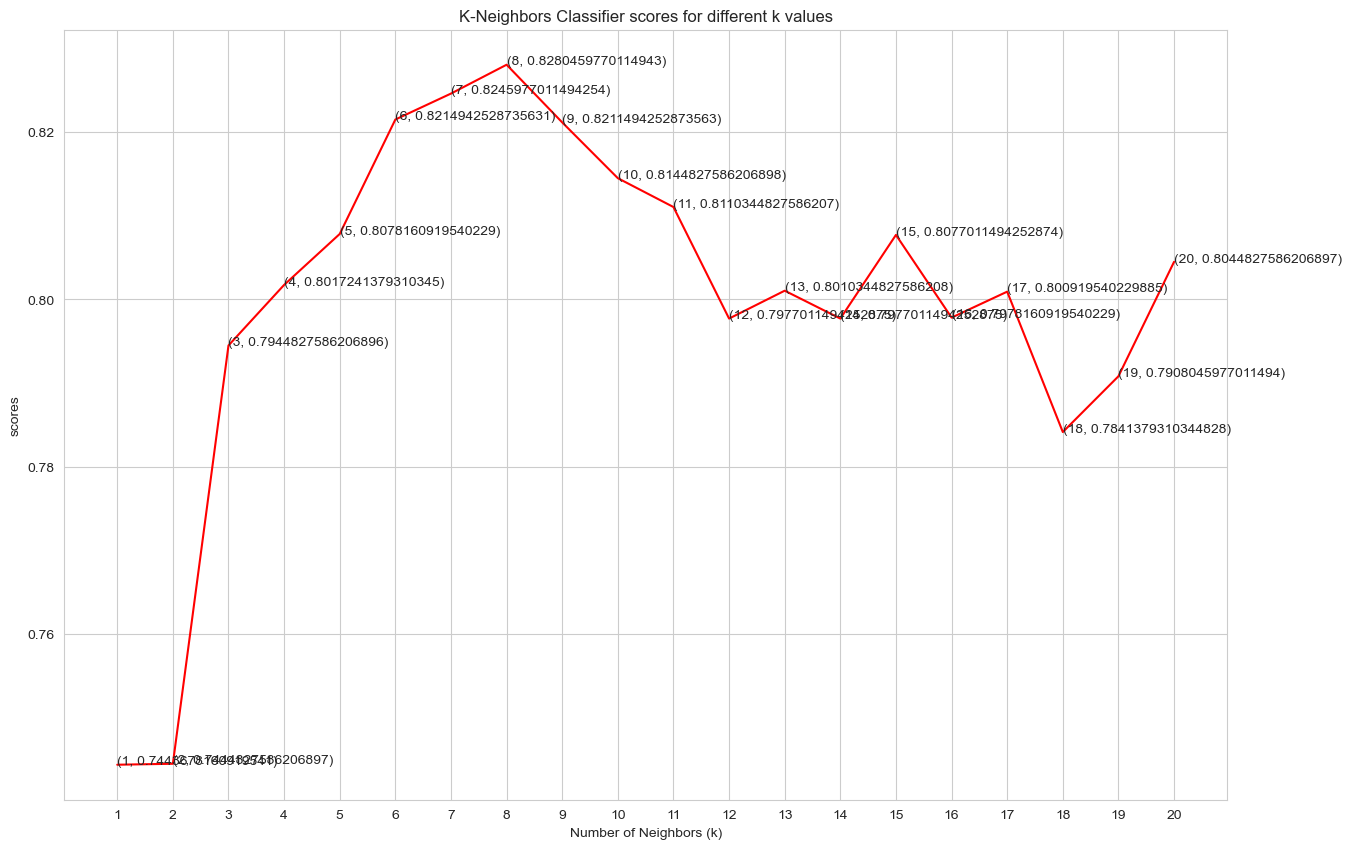

In [21]:
import matplotlib.pyplot as plt

# Create a new figure with a larger size
plt.figure(figsize=(15, 10))

# Rest of the code which is the below code is used to plot the accuracy scores of a k-Nearest Neighbors (KNN) classifier for different values of k on a dataset.
plt.plot([k for k in range(1,21)],knn_scores,color='red')# This line uses the plot() function from the matplotlib.pyplot module to plot a line graph of the KNN accuracy scores. The x-axis values are generated using a list comprehension that creates a list of integers from 1 to 20, representing the different values of k. The y-axis values are provided by the knn_scores list, which contains the accuracy scores for each value of k. The color parameter is set to 'red' to specify the color of the line.
for i in range(1,21): 
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1])) # This loop adds text annotations to the plot indicating the corresponding (k, accuracy) values for each point on the line graph. The text() function is used to add a text label at the specified coordinates (i, knn_scores[i-1]), where i is the x-axis value and knn_scores[i-1] is the corresponding y-axis value. The loop iterates over the same range of integers as the x-axis values.
plt.xticks([i for i in range (1,21)]) # This line sets the x-axis tick locations to be the integers 1 through 20, so that each point on the line graph has a corresponding tick mark on the x-axis.
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('scores')
plt.title('K-Neighbors Classifier scores for different k values') # Overall, this code generates a line graph of KNN accuracy scores for different values of k, with text annotations indicating the corresponding (k, accuracy) values.

# Show the plot
plt.show()

In [24]:
knn_classifier=KNeighborsClassifier(n_neighbors=8) # This line creates a KNN classifier object by calling the KNeighborsClassifier() constructor from the scikit-learn library. The parameter n_neighbors is set to K, which specifies the number of nearest neighbors to consider when making predictions. which we found as highest accuracy when k value is 8
score=cross_val_score(knn_classifier,x,y,cv=10) # This line uses the cross_val_score() function from scikit-learn to perform cross-validation on the KNN classifier. The knn_classifier object is passed as the first argument, while x and y represent the input features and target variable, respectively. The cv parameter is set to 10, which specifies that 10-fold cross-validation should be used,The cross_val_score() function returns an array of scores, where each score represents the accuracy of the KNN classifier on a particular fold of the cross-validation. The score variable is assigned this array of scores.

In [29]:
score.mean()

0.7606896551724137

In [30]:
score # these are scores 

array([0.56666667, 0.5       , 0.8       , 0.86666667, 0.73333333,
       0.96666667, 0.96666667, 0.86206897, 0.68965517, 0.65517241])

## Random Forest Classifier


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# This code creates a Random Forest classifier object with n_estimators set to 10, and then uses cross-validation to evaluate the performance of the classifier on a dataset with input features x and target variable y.
randomforest_classifier=RandomForestClassifier(n_estimators=10) # This line creates a Random Forest classifier object by calling the RandomForestClassifier() constructor from the scikit-learn library. The parameter n_estimators is set to 10, which specifies the number of trees in the forest.
score=cross_val_score(randomforest_classifier,x,y,cv=10) # This line uses the cross_val_score() function from scikit-learn to perform cross-validation on the Random Forest classifier. The randomforest_classifier object is passed as the first argument, while x and y represent the input features and target variable, respectively. The cv parameter is set to 10, which specifies that 10-fold cross-validation should be used.,The cross_val_score() function returns an array of scores, where each score represents the accuracy of the Random Forest classifier on a particular fold of the cross-validation. The score variable is assigned this array of scores. Overall, this code creates a Random Forest classifier object with n_estimators set to 10, and then evaluates its performance using 10-fold cross-validation on a dataset with input features x and target variable y. The resulting array of scores is stored in the score variable.

In [33]:
score.mean() # 

0.7442528735632183

In [34]:
# By this score accuracy of a KNN_Classifier and Random forest Classifier we can say that the accuracy is good for KNN model for predictions